In [13]:
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
from collections import Counter

In [14]:
# Set number of rows and columns
tm.N = 1000
tm.K = 15

cols = ["Stubborn","Enthusiasm","Autonomous","Dreamer","Commitment","Extrovert",\
        "Team Player","Social Network","Industry Yrs","Role Yrs","Competitor Yrs",\
        "Current Job Level","Annual Review Score","University Prestige","Degree"]

df = tm.makeDataFrame()
df.columns = cols
df.index = [x for x in range(tm.N)]

In [15]:
def getRatings():
    return np.random.choice(values, tm.N, p=probabilities)

In [16]:
# Assign everyone random grades
# Some of these columns are binary, e.g. "Degree", or aren't scaled 1-10, e.g. the "Years"
# columns. We'll fix those next step
values = [x for x in range(1,11)]
probabilities = [0.005,0.015,0.06,0.18,0.24,0.24,0.18,0.06,0.015,0.005]

for col in cols:
    df[col] = getRatings()

In [17]:
df["Industry Yrs"] = np.random.randint(low=0,high=25,size=tm.N)
df["Role Yrs"]     = np.random.randint(low=0,high=25,size=tm.N)

values = [0,2,4,6,8,10]
probabilities = [0.87,0.03,0.03,0.03,0.03,0.01]
df["Competitor Yrs"] = np.random.choice(values, tm.N, p=probabilities)

values = [0, 1]
probabilities = [.35,.65]
df["Degree"] = np.random.choice(values, tm.N, p=probabilities)

# Make sure only Degreed people have a University Prestige
df.loc[df['Degree'] == 0, 'University Prestige'] = 0

In [18]:
def plotCol(counter, col):
    X = [k for k in counter.keys()]
    Y = [counter[k] for k in counter.keys()]
    
    plt.bar(X, Y, align='center', alpha=0.5)
    plt.xlabel('Rating')
    plt.title(col)
    plt.show()

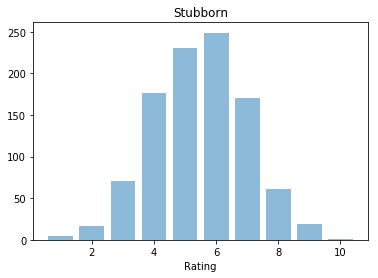

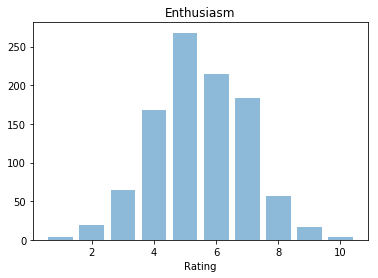

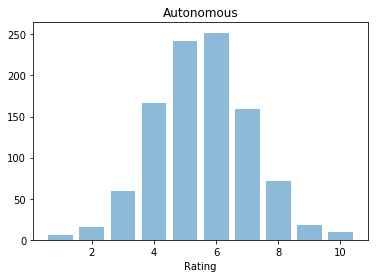

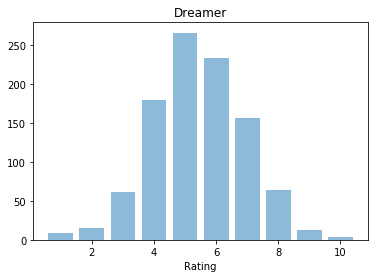

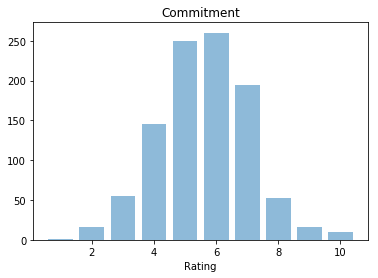

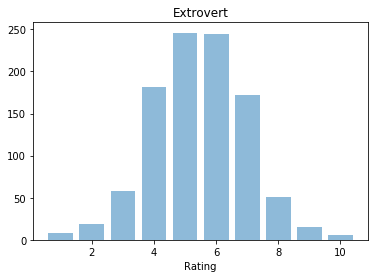

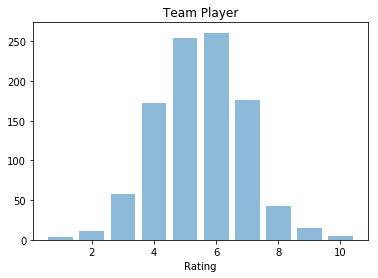

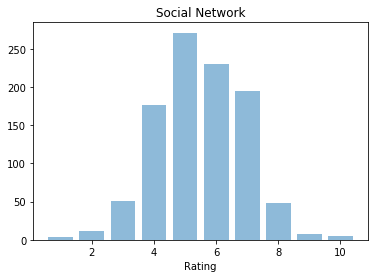

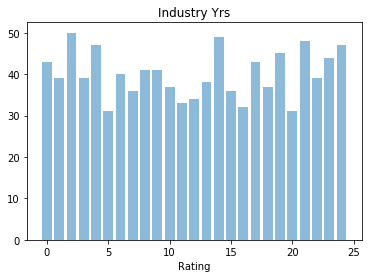

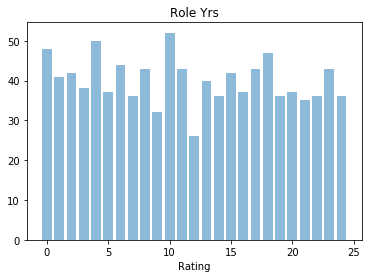

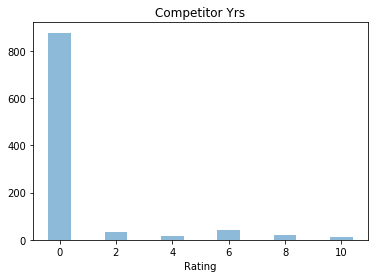

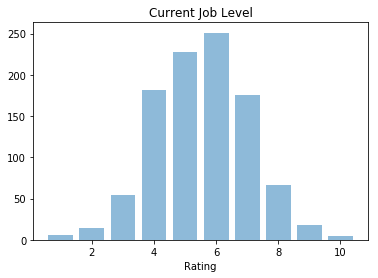

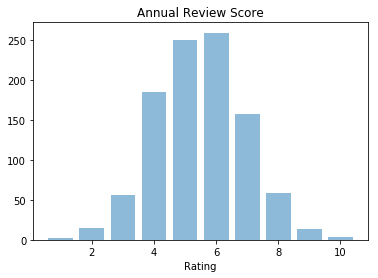

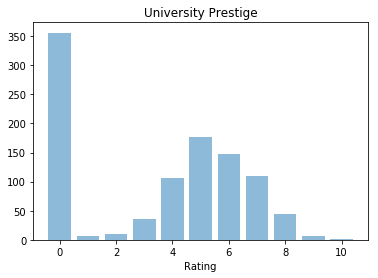

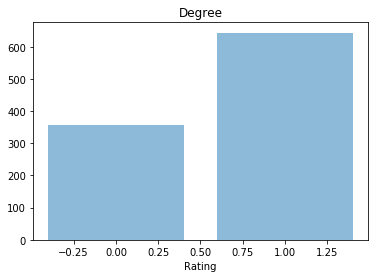

In [35]:
for col in cols:
    counter = Counter(df[col])
    plotCol(counter, col)

In [21]:
# Assign weights to each attribute
weights = np.array([np.random.randn() for x in range(tm.K)])

In [22]:
del df["Score"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ee2940550>]],
      dtype=object)

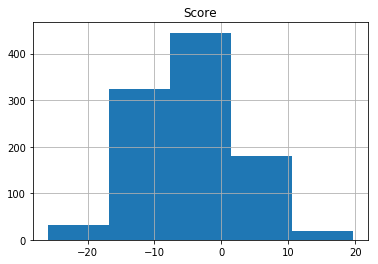

In [23]:
# Apply the weights and calculate a score
def test(row):
    score = (row*weights).sum()
    return score

df["Score"] = df.apply(test, axis=1)

df.hist(column="Score", bins=5)

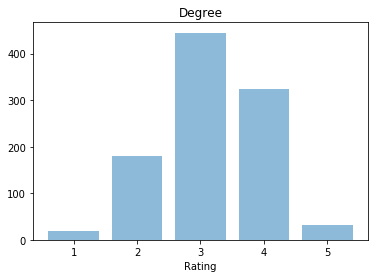

In [24]:
# Bin the Score to get a Grade
b = pd.cut(df["Score"],5, labels=[5, 4, 3, 2, 1])
df["Grade"]=b
del df["Score"]

counter = Counter(df["Grade"])
plotCol(counter, col)

In [25]:
df.to_csv("/home/tbrownex/data/Hackett/HRdemo/data.csv", index=False)